# **Image/video processing 101**
A starting set of useful utilities for handling image and video data.

This workshop provides a set of introductory image/video processing techniques. Useful python libraries:


*   [OpenCV](https://opencv.org/) : Useful library for computer vision tasks
*   [Numpy](https://numpy.org/): Useful library for handling matrices

*   [Pandas](https://pandas.pydata.org/): Useful library for handling tabular data
*   [Matplotlib](https://matplotlib.org/): Useful library for plotting/visualization.



# Step 1: Introduction to images 





## Concept of pixels 

Images are stored as rectangular arrays of multiple discrete “picture elements,” also known as pixels. Each pixel can be considered as a single square point of colored light. 

Consider the following picture of Yosemite National Park.
![Yosemite national park](https://drive.google.com/uc?id=1PdGcaF7xxdiqZuVyN0mirc0jlaYjkGOY)






We zoom into the image near the top of the waterfall. The zoomed image gives us a sense of pixels in an image. All the small squares in the image are pixels.
![picture](https://drive.google.com/uc?id=1lu-HP0UH6VMczegt02vEVhDfmYvV9QPG)

## Image convention

The coordinate system of images will have positive coordinates (no negative coordinates !). The origin is located at the top left corner and the y coordinate values will become larger, as one goes down. This is called the **left handed coordinate system**.
![picture](https://drive.google.com/uc?id=1hTtnxpsxGhsvdQOxBtRkoytRv4t0lSHw)

# Step 2: Handling the libraries


## Installing libraries 
Use pip install for installing the python libraries.

Use the command !pip install <library>




In [ ]:
!pip install numpy 

In [ ]:
!pip install opencv-python #Installing opencv 

In [ ]:
!pip install pandas
!pip install matplotlib

## Import libraries 


In [ ]:
import cv2 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from skimage import io
from google.colab.patches import cv2_imshow

# Step 3: Getting the data 

## Download image from url 

Use wget to download a sample image from a link .

Use the command format:  

```
# wget -O <filename> <link>. 
```

This command downloads the image from link to a local filename.


In [ ]:
#reading image from an URL 
#url="https://cdn.cherwell.org/wp-content/uploads/2020/01/11141049/frozen-two-still-sparkle.jpg"
!wget -O frozen.jpg https://cdn.cherwell.org/wp-content/uploads/2020/01/11141049/frozen-two-still-sparkle.jpg  #downloading the RGB image
!wget -O dog.jpg https://i.stack.imgur.com/B2DBy.jpg #downloading the black and white image

--2021-02-11 07:43:36--  https://cdn.cherwell.org/wp-content/uploads/2020/01/11141049/frozen-two-still-sparkle.jpg
Resolving cdn.cherwell.org (cdn.cherwell.org)... 65.9.73.13, 65.9.73.9, 65.9.73.63, ...
Connecting to cdn.cherwell.org (cdn.cherwell.org)|65.9.73.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 545243 (532K) [image/jpeg]
Saving to: ‘frozen.jpg’

frozen.jpg          100%[===================>] 532.46K  --.-KB/s    in 0.02s   

2021-02-11 07:43:36 (29.3 MB/s) - ‘frozen.jpg’ saved [545243/545243]

--2021-02-11 07:43:36--  https://i.stack.imgur.com/B2DBy.jpg
Resolving i.stack.imgur.com (i.stack.imgur.com)... 151.101.36.193
Connecting to i.stack.imgur.com (i.stack.imgur.com)|151.101.36.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13601 (13K) [image/jpeg]
Saving to: ‘dog.jpg’

dog.jpg             100%[===================>]  13.28K  --.-KB/s    in 0s      

2021-02-11 07:43:36 (75.8 MB/s) - ‘dog.jpg’ saved [13601/13601]

In [ ]:
ls -ltr # checking whether we have the image here locally

total 632
-rw-r--r-- 1 root root  91441 Apr 27  2018 lion.jpg
-rw-r--r-- 1 root root 545243 Jan 11  2020 frozen.jpg
drwxr-xr-x 1 root root   4096 Feb  4 15:26 sample_data/


# Step 4: Read/Display Images


## Read the image and display

Read the image using opencv and display it using cv2_imshow functionality.

Images are usually available in two formats:


*   **Grayscale**: Grayscale images are usually in black and white format.
*   **RGB**: RGB images are color images. 

Opencv reads the image in **BGR** format. 



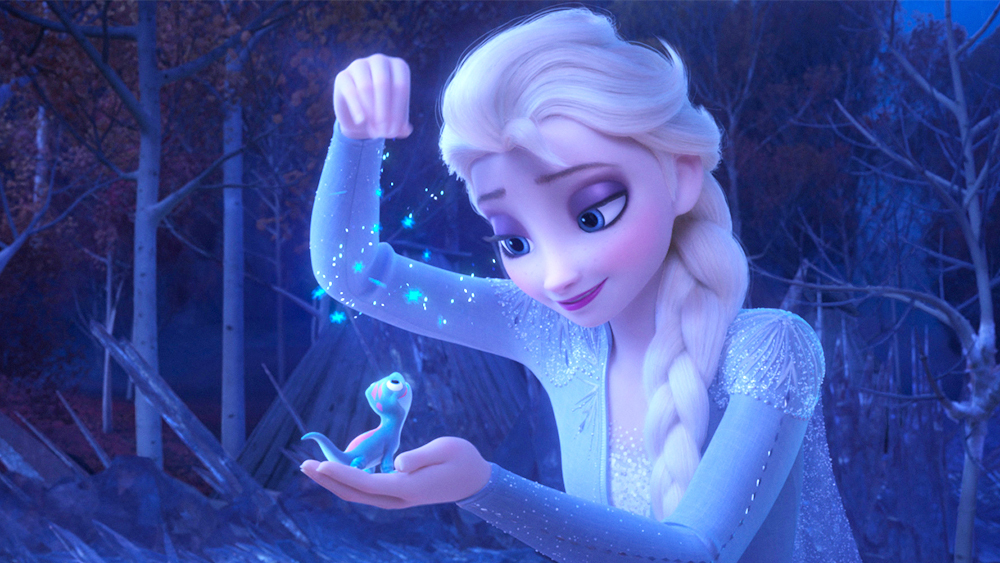

In [ ]:
image_RGB_data=cv2.imread('frozen.jpg')
cv2_imshow(image_RGB_data) #displaying the RGB image 
#cv2.imshow crashes in google colab

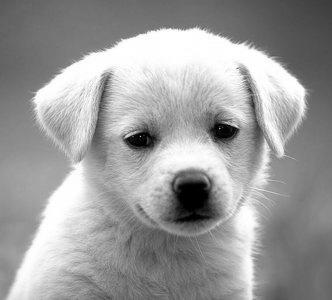

In [ ]:
image_BW_data=cv2.imread('dog.jpg')
cv2_imshow(image_BW_data)

## Checking the size and format of the image data 

Opencv reads the image data in numpy matrix .

For RGB images, the data read is a 3D numpy array with format **(height, width,3)**.

For BW images, the data read is a 2D numpy array with format **(height, width)**.

**General format**: (height, width, number of channels)

For RGB, **number of channels=3**.

For BW, **number of channels=1**

In [ ]:
print(image_RGB_data.dtype) #data type of the RGB image 
print(image_RGB_data.shape) #shape of the RGB data (height,width,number of channels)
print(image_BW_data.shape)#shape of the grayscale data (height,width)

uint8
(563, 1000, 3)
(300, 332, 3)


## Conversion of image from RGB to Grayscale

Often, many applications require conversion of RGB data to grayscale format. Following is an example using opencv:

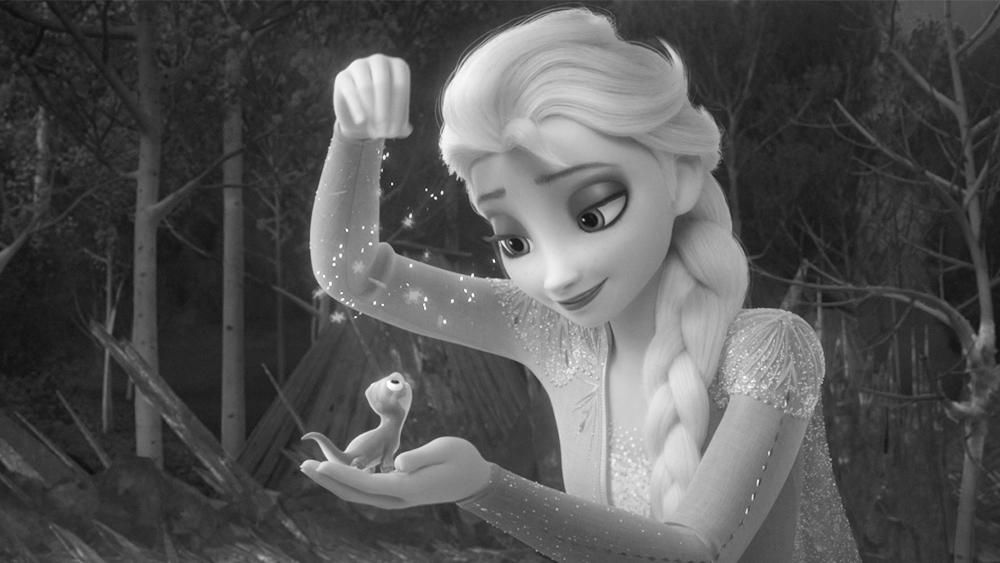

255


In [17]:
#we take the RGB image of frozen 
image_RGB2GRay=cv2.cvtColor(image_RGB_data,cv2.COLOR_BGR2GRAY) #  remember opencv reads image in BGR format 
#hence the string BGR2GRAY
cv2_imshow(image_RGB2GRay)

# Step 5: Histogram operations 


## Histogram of an image 

Histogram of an image gives an idea about the distribution of various pixel values. By going through the histogram, you get an intuition about contrast, brightness, intensity distribution etc of that image.



Visit this interesting link for more details: [Cambridge in color](https://www.cambridgeincolour.com/tutorials/histograms1.htm)

## Histogram computation of an image 

In order to compute histogram, we start with grayscale images and then proceed to RGB images.

### Histogram of a grayscale image 

We use the numpy functionality np.histogram to compute the histogram of grayscale image.



In [20]:
histogram, bin_edges = np.histogram(image_RGB2GRay, bins=256, range=(0, 255))

(256,)


The parameter **bins** determines the size of the histogram. Since we want to compute the number of pixels for all the 256 possible pixel values, the number of bins is set to 256. Range determines the minimum to maximum possible values of pixels in the grayscale image.  

The first output of **np.histogram** provides a numpy array with 256 entries. Entry at index i (pixel value i) determines the number of pixels in the image having that pixel value i. We plot the histogram using matplotlib library. 

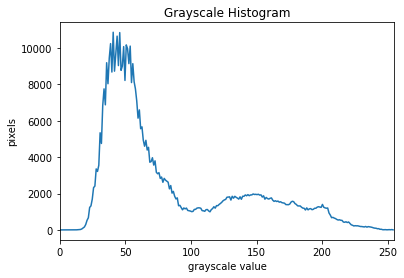

In [19]:
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
plt.xlim([0, 255]) 
plt.plot(bin_edges[0:-1], histogram) 
plt.show()

Possible topics:
1. Histogram equalization
2. Edge detection: Canny, Sobel
3. Filtering: Avergae Filtering, Median Filtering, Bilateral filtering
4. General augmentation: flipping, cropping, noise addition
5. SIFT/HOG/SURF
6. Video loading/handling
7. FFmpeg examples
8. Video augmentation
